In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from itertools import product

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
adder = pd.DataFrame(product([0, 1], [0, 1], [0, 1]), columns=['cin', 'X1', 'X2'])
#adder['S'] = [0, 1, 1, 0, 1, 0, 0, 1]
#adder['cout'] = [0, 0, 0, 1, 0, 1, 1, 1]
adder['S'] = [0, 0, 0, 0, 0, 0, 0, 1]
adder

,cin,X1,X2,S
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,0
4,1,0,0,0
5,1,0,1,0
6,1,1,0,0
7,1,1,1,1


In [9]:
limit = [[0.0, 0.2], [0.8, 1.0]]

In [19]:
limit = [[0.1, 0.05], [0.9, 0.05]]

In [20]:
dataset = []
for i in range(10000):
    for x, j in adder.iterrows():
        num = j.tolist()
        #dataset.append([np.random.uniform(*limit[i]) for i in num])
        dataset.append([np.random.normal(*limit[i]) for i in num])
df = pd.DataFrame(dataset, columns=adder.columns)
df

,cin,X1,X2,S
0,0.086152,0.128389,0.075257,0.058929
1,0.095020,0.126475,0.940072,0.104557
2,0.101836,0.883936,0.101151,0.109729
3,0.091494,0.956312,0.979634,0.056462
4,0.900500,0.090859,0.136872,0.092072
...,...,...,...,...
79995,0.168471,0.904538,0.931893,0.131077
79996,0.972029,0.153607,0.082576,0.049062
79997,0.860044,0.084402,0.941752,0.207385
79998,0.903877,0.930557,0.109219,0.055992


In [21]:
X = df[['cin', 'X1', 'X2']]
y = df['S']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
model = MLPRegressor(hidden_layer_sizes=(1,), activation='logistic')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8968567142370483

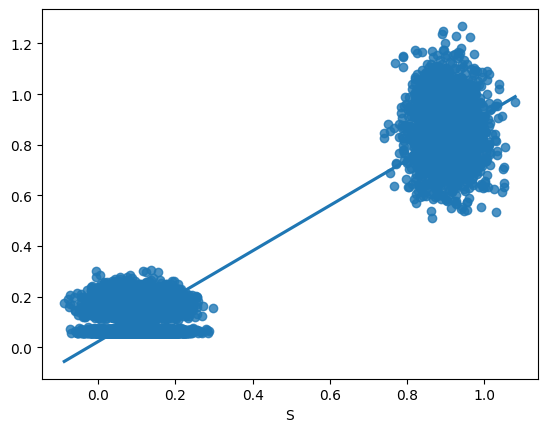

In [24]:
sns.regplot(y_test, y_pred)
plt.show()

In [25]:
model.coefs_

[array([[-3.09014095],
        [-3.08828899],
        [-3.0968227 ]]),
 array([[-1.9164648]])]